# 필요한 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# 데이터 불러오기 및 군집화 적용

In [ ]:
raw = pd.read_csv('USArrests.csv',index_col=[0])
pca_df = pd.read_csv('pca_df.csv',index_col=[0])

standard_data = StandardScaler().fit_transform(raw.values)
data = pd.DataFrame(standard_data,columns=raw.columns,index=raw.index)

kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

# 분류에 따라서 그림 그리기(Kmeans)

In [ ]:
pca_df['cluster'] = kmeans.labels_

f1 = pca_df[pca_df['cluster'] == 0]
f2 = pca_df[pca_df['cluster'] == 1]
f3 = pca_df[pca_df['cluster'] == 2]

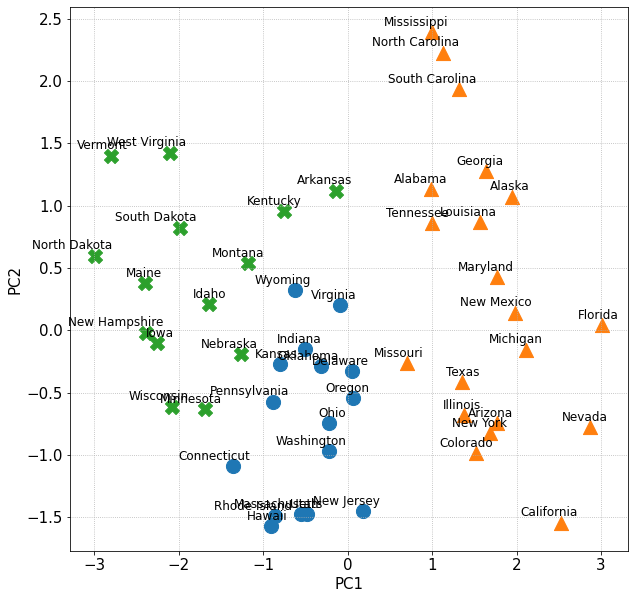

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
i = 0
for f in [f1,f2,f3]:
  if i == 0:
    s= 'o'
  elif i == 1:
    s = '^'
  elif i == 2:
    s = 'X'
  else:
    s = 'p'
  ax.scatter(f['pc_1'],f['pc_2'],marker=s,s=200)
  i += 1
for i, txt in enumerate(data.index):
    ax.annotate(txt, (pca_df['pc_1'][i]+0.2,pca_df['pc_2'][i]+0.05),\
                size=10, xytext=(0,0), ha='right', textcoords='offset points',fontsize=12)
plt.setp([ax.get_xticklabels(),ax.get_yticklabels()],fontsize=15)
ax.set_xlabel("PC1",fontsize=15);ax.set_ylabel("PC2",fontsize=15)
ax.grid(linestyle=':')

# DBSCAN

In [ ]:
plt.close()

dbscan = DBSCAN(eps=0.9,min_samples=3)
pca_df['dbs_cluster'] = dbscan.fit_predict(data)

In [ ]:
c1 = pca_df[pca_df['dbs_cluster'] == 0]
c2 = pca_df[pca_df['dbs_cluster'] == 1]
c3 = pca_df[pca_df['dbs_cluster'] == 2]
c4 = pca_df[pca_df['dbs_cluster'] == 3]
c5 = pca_df[pca_df['dbs_cluster'] == -1]

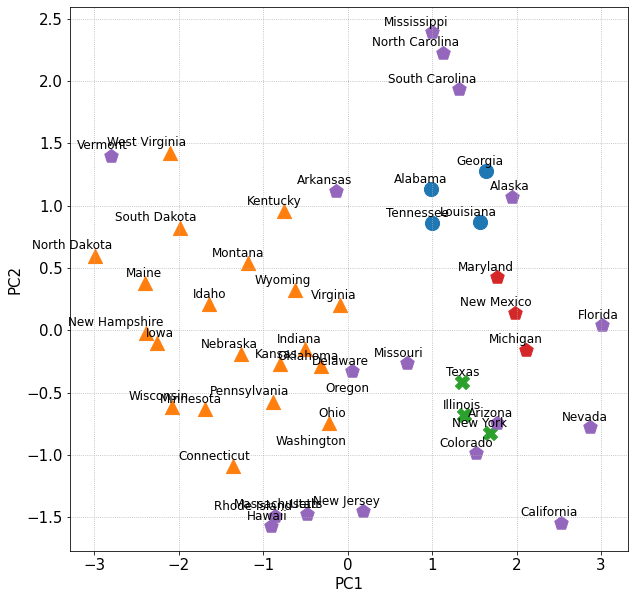

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
i = 0
for f in [c1,c2,c3,c4,c5]:
  if i == 0:
    s= 'o'
  elif i == 1:
    s = '^'
  elif i == 2:
    s = 'X'
  else:
    s = 'p'
  ax.scatter(f['pc_1'],f['pc_2'],marker=s,s=200)
  i += 1
for i, txt in enumerate(data.index):
    ax.annotate(txt, (pca_df['pc_1'][i]+0.2,pca_df['pc_2'][i]+0.05),\
                size=10, xytext=(0,0), ha='right', textcoords='offset points',fontsize=12)
plt.setp([ax.get_xticklabels(),ax.get_yticklabels()],fontsize=15)
ax.set_xlabel("PC1",fontsize=15);ax.set_ylabel("PC2",fontsize=15)
ax.grid(linestyle=':')

# 덴드로그램

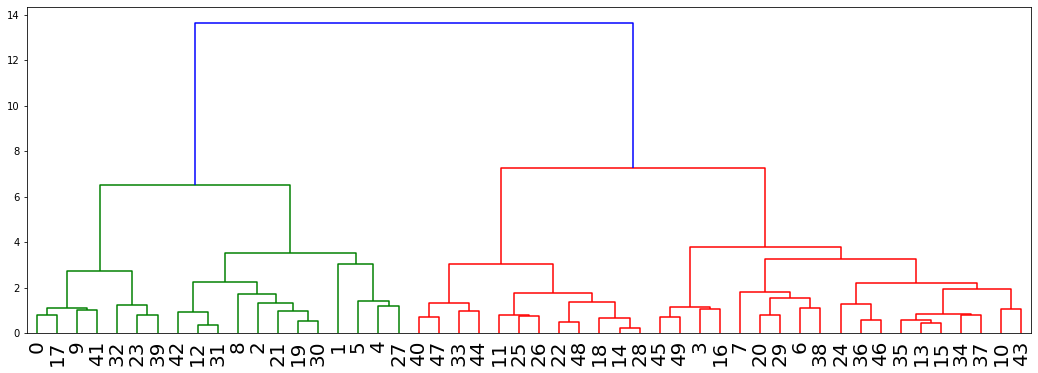

In [ ]:
plt.close()

agg_cluster = linkage(data, method='ward')

plt.figure(figsize=(18,6))
dendrogram(agg_cluster,leaf_rotation=90,leaf_font_size=20)
plt.show()

In [ ]:
plt.close()

agg_c = AgglomerativeClustering(n_clusters=4)
pca_df['agg_cluster'] = agg_c.fit_predict(data)

In [ ]:
a1 = pca_df[pca_df['agg_cluster'] == 0]
a2 = pca_df[pca_df['agg_cluster'] == 1]
a3 = pca_df[pca_df['agg_cluster'] == 2]
a4 = pca_df[pca_df['agg_cluster'] == 3]

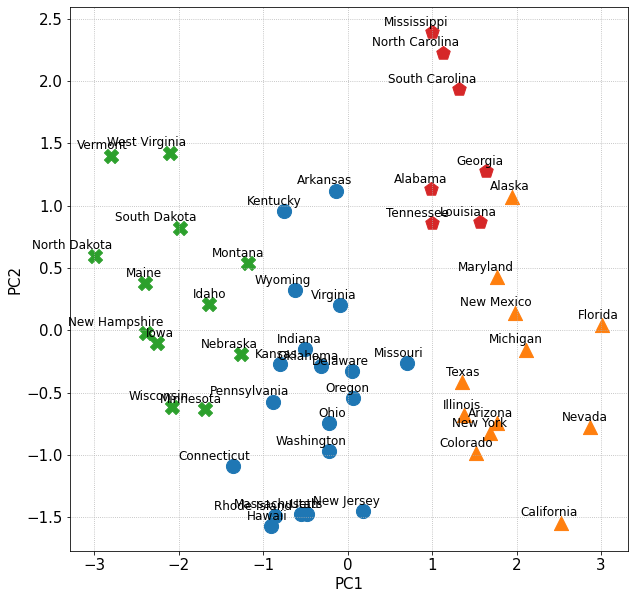

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
i = 0
for f in [a1,a2,a3,a4]:
  if i == 0:
    s= 'o'
  elif i == 1:
    s = '^'
  elif i == 2:
    s = 'X'
  else:
    s = 'p'
  ax.scatter(f['pc_1'],f['pc_2'],marker=s,s=200)
  i += 1
for i, txt in enumerate(data.index):
    ax.annotate(txt, (pca_df['pc_1'][i]+0.2,pca_df['pc_2'][i]+0.05),\
                size=10, xytext=(0,0), ha='right', textcoords='offset points',fontsize=12)
plt.setp([ax.get_xticklabels(),ax.get_yticklabels()],fontsize=15)
ax.set_xlabel("PC1",fontsize=15);ax.set_ylabel("PC2",fontsize=15)
ax.grid(linestyle=':')